In [1]:
## projet présenté porte sur le sujet 2 de scraping du site imb, à cet effet je vous mettez ici le lien github du projet complet, le sujet de scaping de données est le numéro 2.
## https://github.com/amoungui/my_scrapping_project/tree/master
https://github.com/amoungui/my_scrapping_project/tree/master

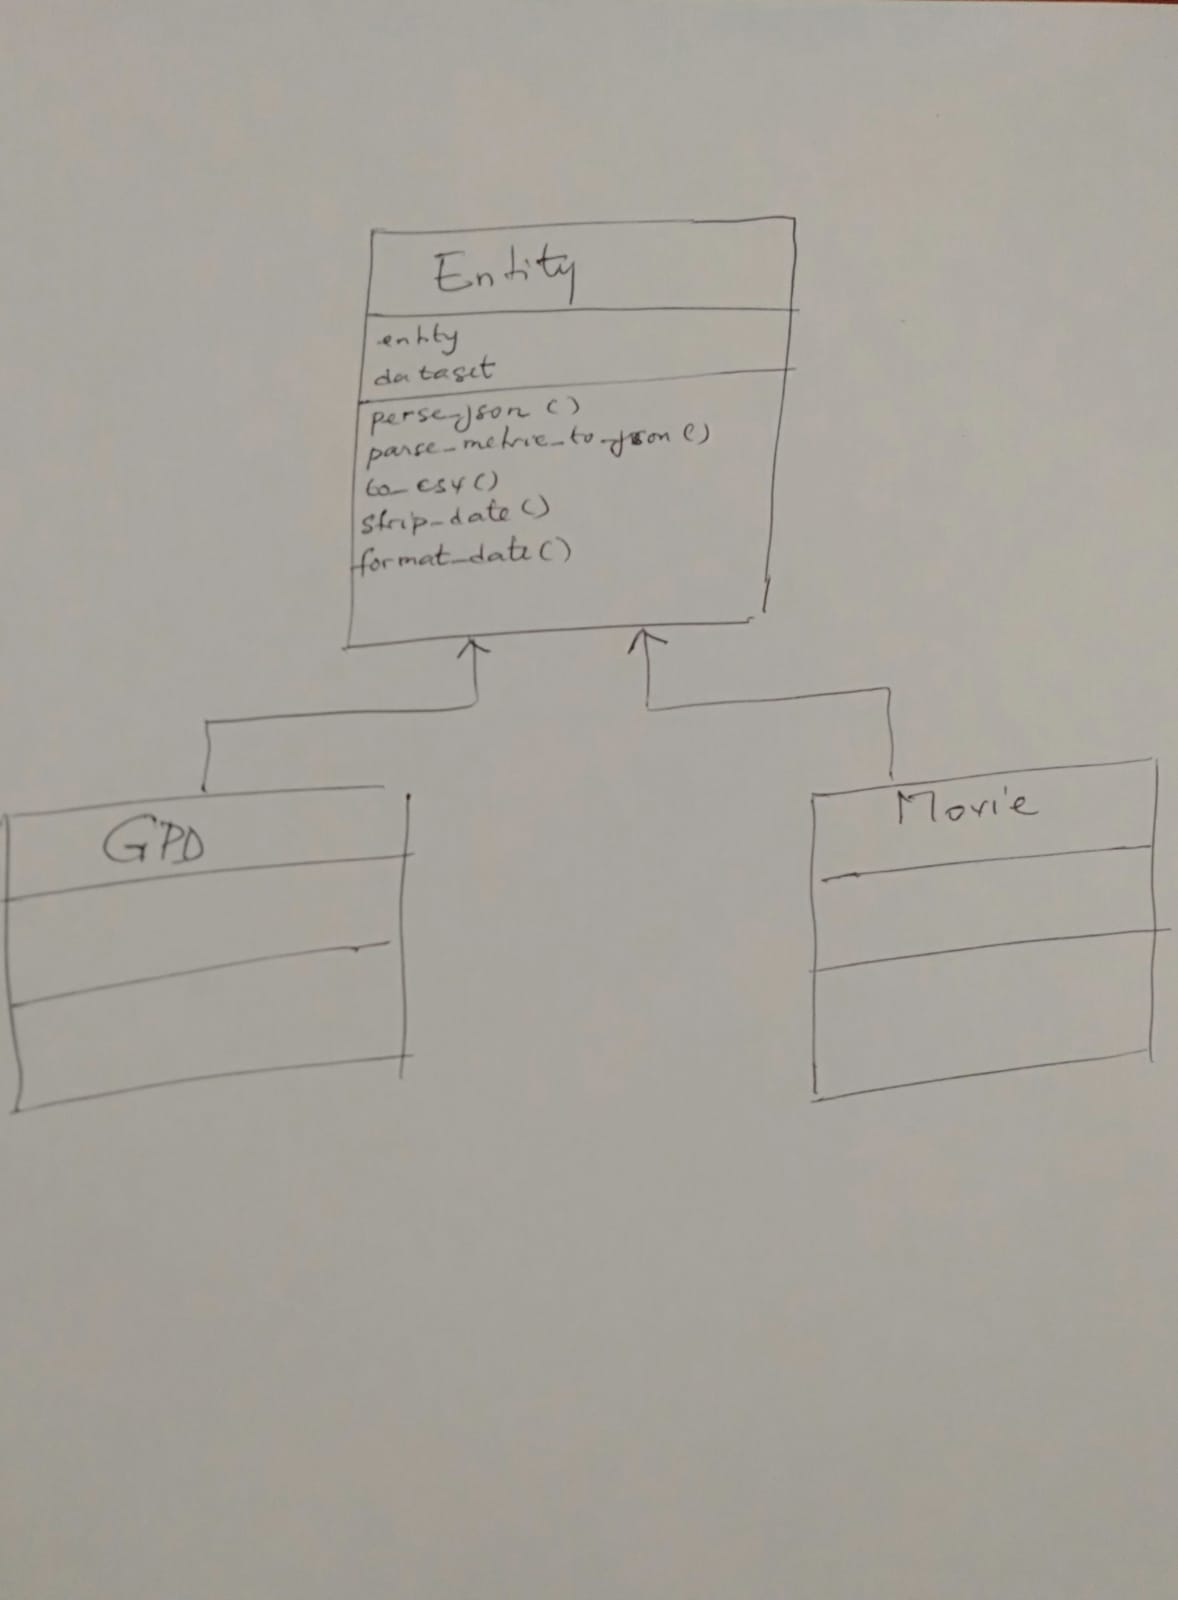

In [4]:
from IPython.display import Image
Image("img/diagrame_de_classes.jpeg", width=50, height=50)

In [138]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [159]:
df = pd.read_csv("data/dataset.csv")

In [160]:
len(df)#df.head(5) #

840

In [ ]:
# Avant tout chose nous devons formater les données du dataset

In [141]:
# formatage sur les date car il y a des films qui n'ont pas de date de sortie
def format(x):
    if 'xxx' in x :
        return '2000-01-01'
    if 'xxx' not in x :
        return x
df['release date'] = df['release date'].apply(lambda x: format(x))        

In [142]:
# convertion des montant car il y en a des films qui n'ont de budget en RI 
def convert_(x):
    if x in 'xxx' or 'INR' in x:
        return 1

    else:
        return float(x) # INR56300000            

In [143]:
df['Cumulate Worldwide Gross en $'] = df['Cumulate Worldwide Gross en $'].apply(lambda x: convert_(x))

In [144]:
df['budget en $'] = df['budget en $'].apply(lambda x: convert_(x))

In [38]:
## 1. Distribution des films par catégorie 

In [145]:
data1 = df
data1 = data1.set_index('type')
data1.groupby('type')['title'].apply(lambda x: x)

type
Comedy; Drama                      Hababam Sinifi
Comedy; Drama         Maratonci trce pocasni krug
Comedy; Drama                    Balkanski spijun
Comedy; Drama                          Zügürt Aga
Comedy; Drama                           Marmoulak
                                ...              
Crime; Film-Noi              Règlement de comptes
Crime; Film-Noi         L'Inconnu du Nord-Express
Crime; Film-Noi                 Le faucon maltais
Fantasy; Drama;                            Orphée
Crime; Horror;     Le testament du docteur Mabuse
Name: title, Length: 840, dtype: object

In [146]:
## 2. Top 50 des budgets des films
data2 = df
data2[['budget en $', 'title']].sort_values('budget en $', ascending=False).head(50)

,budget en $,title
142,356000000.0,Avengers: Endgame
143,321000000.0,Avengers: Infinity War
148,250000000.0,The Dark Knight Rises
668,220000000.0,Avengers
323,200000000.0,Toy Story 3
10,185000000.0,The Dark Knight : Le Chevalier noir
154,180000000.0,WALL·E
314,175000000.0,Là-haut
419,175000000.0,Vice-versa
146,175000000.0,Coco


In [33]:
## 3. Nombre de films sortie par décennie

In [147]:
df['release date'] = pd.to_datetime(df['release date'])
data3 = df.set_index('release date')
data3.groupby((data3.index.year//10)*10).sum()

,rating,vote,budget en $,Cumulate Worldwide Gross en $
release date,,,,
1920,162.6,851839,3.959419e+06,3.420561e+06
1930,114.0,851366,7.820938e+06,8.396830e+05
1940,268.2,3566162,3.008369e+07,7.415939e+07
1950,546.5,6239432,5.249570e+07,4.850468e+08
1960,637.7,7100426,1.545638e+08,7.515278e+08
1970,714.4,13544625,2.047659e+08,3.175889e+09
1980,609.6,15789070,5.473114e+08,3.761300e+09
1990,850.0,38197601,1.413540e+09,1.018272e+10
2000,1197.1,50391301,3.366170e+09,1.821131e+10


In [59]:
## 4 Top 20 films ayant générés le plus de revenu, le moins de revenu.

In [60]:
## 4.1. Top 20 films ayant générés le plus de revenu.

In [148]:
data4 = df
data4[['title', 'Cumulate Worldwide Gross en $']].sort_values('Cumulate Worldwide Gross en $', ascending=False).head(10)

,title,Cumulate Worldwide Gross en $
142,Avengers: Endgame,2.797501e+09
143,Avengers: Infinity War,2.048360e+09
668,Avengers,1.518816e+09
441,Harry Potter et les Reliques de la Mort 2ème p...,1.342322e+09
18,Le Seigneur des anneaux : Le Retour du roi,1.146031e+09
109,The Lion King,1.083721e+09
148,The Dark Knight Rises,1.081143e+09
133,Joker,1.074251e+09
323,Toy Story 3,1.066971e+09
500,Jurassic Park,1.033928e+09


In [38]:
## 4.2. Top 20 films ayant générés le moins de revenu.

In [149]:
data5 = df
data5[['title', 'Cumulate Worldwide Gross en $']].sort_values('Cumulate Worldwide Gross en $', ascending=False).tail(5)

,title,Cumulate Worldwide Gross en $
236,Close-Up,1.0
229,Vuk,1.0
224,Mudhalvan,1.0
223,Alai Payuthey,1.0
0,Hababam Sinifi,1.0


In [40]:
## 5. Analyse de la popularité des films en fonction de leurs budgets

In [150]:
data6 = df
data6 = data4.set_index('budget en $')
data6.groupby(by='budget en $', axis=0, sort=True)[['title', 'vote']].apply(lambda x: x).sort_values('budget en $', ascending=False)

,title,vote
budget en $,,
356000000.0,Avengers: Endgame,875535
321000000.0,Avengers: Infinity War,878130
250000000.0,The Dark Knight Rises,1545338
220000000.0,Avengers,1281819
200000000.0,Toy Story 3,769889
...,...,...
1.0,Nous nous sommes tant aimés!,5759
1.0,Deewaar,10302
1.0,Mes chers amis,6770


In [ ]:
## 6. Distribution des revenus générés par genre de film

In [151]:
data7 = df
data7 = data7.set_index('type')
data7.groupby(by='type')[['title', 'gross en $']].apply(lambda x: x).sort_values('gross en $', ascending=True)

,title,gross en $
type,,
Action; Crime;,Troupe d'élite - L'ennemi intérieur,100119
Crime; Drama; M,Seven,100125643
Drama; Sport,Million Dollar Baby,100492203
Drama; Western,Impitoyable,101157447
Crime; Drama; F,Le roman de Mildred Pierce,10128
...,...,...
Comedy; Crime;,Saban Oglu Saban,xxx
Crime; Drama; T,L'idiot !,xxx
Crime; Drama; T,Sur les quais...,xxx


In [ ]:
## 7. Top 10 des films par retour sur investissement

In [152]:
data8 = df
data8['roi'] = data8['budget en $']/data8['Cumulate Worldwide Gross en $']

In [131]:
data8['roi'].sort_values()

25    2.246443e-07
26    1.347702e-06
31    5.524831e-06
8     1.579779e-03
3     2.437825e-02
19    3.739563e-02
35    4.751769e-02
20    6.828879e-02
34    8.109390e-02
18    8.202222e-02
33    1.035992e-01
10    1.839014e-01
27    1.911961e-01
14    2.706316e-01
32    6.224700e-01
1     8.675347e-01
29    1.000000e+00
30    1.000000e+00
24    1.000000e+00
23    1.000000e+00
28    1.000000e+00
22    1.000000e+00
0     1.000000e+00
17    1.000000e+00
16    1.000000e+00
13    1.000000e+00
12    1.000000e+00
11    1.000000e+00
9     1.000000e+00
6     1.000000e+00
21    1.000000e+00
36    1.000000e+00
5     2.814582e+02
15    3.664921e+02
2     4.130155e+05
7     6.603062e+05
4     2.060877e+06
Name: roi, dtype: float64

In [45]:
## 8. Note moyenne par année de sortie de film

In [153]:
data9 = df
data9 = data9.set_index('release date')
data9.groupby(by=data9.index.year, axis=0, sort=True)[['title', 'rating']].sum().sort_values('rating', ascending=False)

,rating
release date,
2019,256.9
2014,227.7
2016,190.4
2018,183.3
2000,164.7
...,...
1940,8.1
1923,8.1
1922,8.1


In [71]:
## Mes propositions d'analyse du dataset

In [72]:
## 9. calculer le ration des budgets des films sorties par pays par année

In [154]:
def convert_int(x):
    if x in 'xxx':
        return 0
    else:
        return float(x) # .replace('.', '')

In [134]:
data10 = df
data10.pivot_table(values='budget en $', index='release date', columns='release country')

release country,Arabia,Bangladesh,Germany,India,Japan,Lanka,Turkey,UK,USA,Yugoslavia
release date,,,,,,,,,,
1957-09-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350000.0,NaN
1961-01-28,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1968-03-08,NaN,NaN,1200000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-10-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6000000.0,NaN
1975-04-01,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1975-08-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13000000.0,NaN
1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1976-02-01,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1977-01-01,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [ ]:
## 10. Determiner le score et types de film produit par auteur(writter) 

In [155]:
data11 = df
data11['score'] = data11['score'].apply(lambda x: convert_int(x))
data_pivot = data11.pivot_table(values='score', index='writter', columns='type')
data_pivot

type,Action; Adventu,Action; Biograp,Action; Comedy;,Action; Crime;,Action; Drama,Action; Drama;,Action; Mystery,Action; Romance,Action; Sci-Fi,Action; Sci-Fi;,...,Film-Noir; Myst,Horror,Horror; Mystery,Horror; Sci-Fi,Horror; Thrille,Mystery; Romanc,Mystery; Sci-Fi,Mystery; Thrill,Thriller; Myste,Western
writter,,,,,,,,,,,,,,,,,,,,,
A.K. Lohithadas,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.N. Balakrishnan,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.R. Murugadoss,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aaron Guzikowski,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abbas Kiarostami,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zeki Demirkubuz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zenzô Matsuyama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zoya Akhtar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
## 11. determination du nombre de vote total que chaque compositeur (Writter) a pu avoir dans toute sa carrière de cinéaste
data_pivot.sum(axis=1)

writter
A.K. Lohithadas       0.0
A.N. Balakrishnan     0.0
A.R. Murugadoss       0.0
Aaron Guzikowski     70.0
Abbas Kiarostami      0.0
                     ... 
Zeki Demirkubuz       0.0
Zenzô Matsuyama       0.0
Zoya Akhtar          65.0
xxx                  90.0
Özge Efendioglu       0.0
Length: 658, dtype: float64

In [ ]:
## représentation du budget de réalisation en fonction du retour sur investissement

C:\Users\Amoungui\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Amoungui\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Amoungui\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2065: FutureWarning: Using `vertical=True` to control the orientation of the plot  is deprecated. Instead, assign the data directly to `y`. 
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='budget en $', ylabel='Cumulate Worldwide Gross en $'>

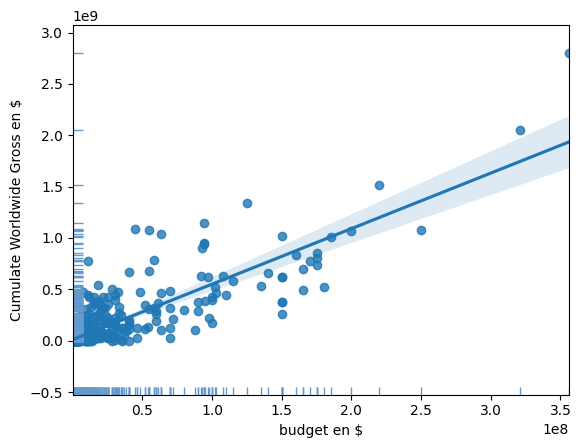

In [157]:
fig, ax = plt.subplots()
sns.regplot(x="budget en $", y="Cumulate Worldwide Gross en $", data=df, ax=ax, lowess=False)  
# adding the small lines to indicate individual data points
sns.rugplot(df["budget en $"].dropna(), axis='x', 
            color="#6699cc", height=0.02, ax=ax)
sns.rugplot(df["Cumulate Worldwide Gross en $"].dropna(), axis='y', 
            color="#6699cc", height=0.02, ax=ax)